<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/visualizing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing imputed dataset (imputed by crude backfilling)


In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Mounted at /gdrive


In [2]:
%cd "/gdrive/My Drive/tensor-flow-state/tensor-flow-state"

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
import pandas as pd
df = pd.read_csv("data/df_imputed_week_shift.csv", index_col = 0, parse_dates = True)

In [0]:
cols = ["speed", "flow", "speed_-2", "speed_-1","speed_+1", "speed_+2", "flow_-2", "flow_-1", "flow_+1", "flow_+2", "speed_limit"]
speed_cols = ["speed", "speed_-2", "speed_-1","speed_+1", "speed_+2"]
flow_cols = ["flow", "flow_-2", "flow_-1", "flow_+1", "flow_+2"]

In [0]:
import numpy as np
def resample_df(df, freq = "D", method_speed = np.mean, method_flow = np.sum):
    copied = df.resample(freq).agg({
           "speed": method_speed, "speed_-2": method_speed, "speed_-1": method_speed, "speed_+1": method_speed, "speed_+2": method_speed,
           "flow": method_flow, "flow_-2": method_flow, "flow_-1": method_flow, "flow_+1": method_flow, "flow_+2": method_flow})
    return copied

In [0]:
df_D = resample_df(df, method_speed = np.mean)
df_W = resample_df(df, freq = "W", method_speed = np.mean)

Visualize unimputed df

In [0]:
df_raw = pd.read_csv("data/combined_df.csv", index_col = 0, parse_dates = True)

In [79]:
df_raw_W = resample_df(df, freq = "W", method_speed = np.mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  """


In [0]:
raw = df_raw[["speed", "flow", "speed_limit"]].copy()

In [0]:
raw["not_null"] = np.where(((raw.speed.notnull()) | (raw.flow.notnull())), 1, np.nan)

In [0]:
rawres = raw.resample("W").agg({"speed": np.mean, "flow": np.sum, "speed_limit": np.median, "not_null": np.sum})

In [110]:
rawres

,speed,flow,speed_limit,not_null
2011-01-09,105.776626,472819.633333,100.0,10043.0
2011-01-16,105.793647,520566.766667,100.0,10068.0
2011-01-23,105.626244,523850.533333,100.0,10072.0
2011-01-30,105.737199,533144.633333,100.0,10068.0
2011-02-06,105.825072,522463.566667,100.0,10019.0
...,...,...,...,...
2019-12-01,100.765364,637799.000000,100.0,10018.0
2019-12-08,101.889583,624232.000000,100.0,10011.0
2019-12-15,102.671158,636876.000000,100.0,9968.0
2019-12-22,103.630982,623754.000000,100.0,9910.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

x, y1, y2 = df_raw_W.index, df_raw_W., df_raw_W.speed

mpl.rcParams["figure.dpi"] = 600
sns.set(context="paper", style="white")
# create figure, ax
fig, ax1 = plt.subplots()
# set title
ax1.set_title("Daily measurement discrepancies Jun-Aug "19\nbetween 2 adjacent NDW sensors on A2 north by ArenA")
ax1.plot(x, y1, "b-", label = r"$volume\; divergence\;$")
ax1.set_ylabel("$\Delta\; Volume\;  [V_2 - V_1]$", color="b")
ax1.set_ylim([-4200,6000])
ax1.axvline(x="2019-06-24", color = "y", lw = "12", alpha = 0.3, zorder=1)
ax1.axvline(x="2019-06-01", color = "y", lw = "4", alpha = 0.3, zorder=1)
ax1.axvline(x="2019-07-11", color = "y", lw = "5", alpha = 0.3, zorder=1)
ax1.axvline(x="2019-08-31", color = "y", lw = "3", alpha = 0.3, zorder=1)
# ax.axhline(y=1200, color="b", lw=2, alpha=0.5, zorder=10)
ax1.axhline(y=0, color="black", lw=1, alpha=1, zorder=0)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for tick in ax1.get_yticklabels():
    tick.set_color("b")
# create second ax in same fig, sharing x-axis with ax1
ax2 = ax1.twinx()
ax2.plot(x, y2, "r-", label = r"$mean\; velocity$")
ax2.set_ylabel(r"$Velocity\; [\frac{\bar v_1 + \bar v_2}{2}]$", color="r")
ax2.set_ylim([-84, 120])
for tl in ax2.get_yticklabels():
    tl.set_color("r")
# ax2.text("2019-08-29", -62, f"Mean flow difference: {diff_df.flow_diff.mean():.2f}",
#         horizontalalignment="right",
#         verticalalignment="bottom", color="b", fontsize=8)
# ax2.text("2019-08-29", -72, f"Mean speed: {diff_df.speed_avg.mean():.2f}",
#         horizontalalignment="right",
#         verticalalignment="bottom", color="r", fontsize=8)
ax2.text("2019-08-30", -82, f"Correlation: {pearson_correlation_coef:.3f}",
         horizontalalignment="right",
         verticalalignment="bottom", fontsize=9)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

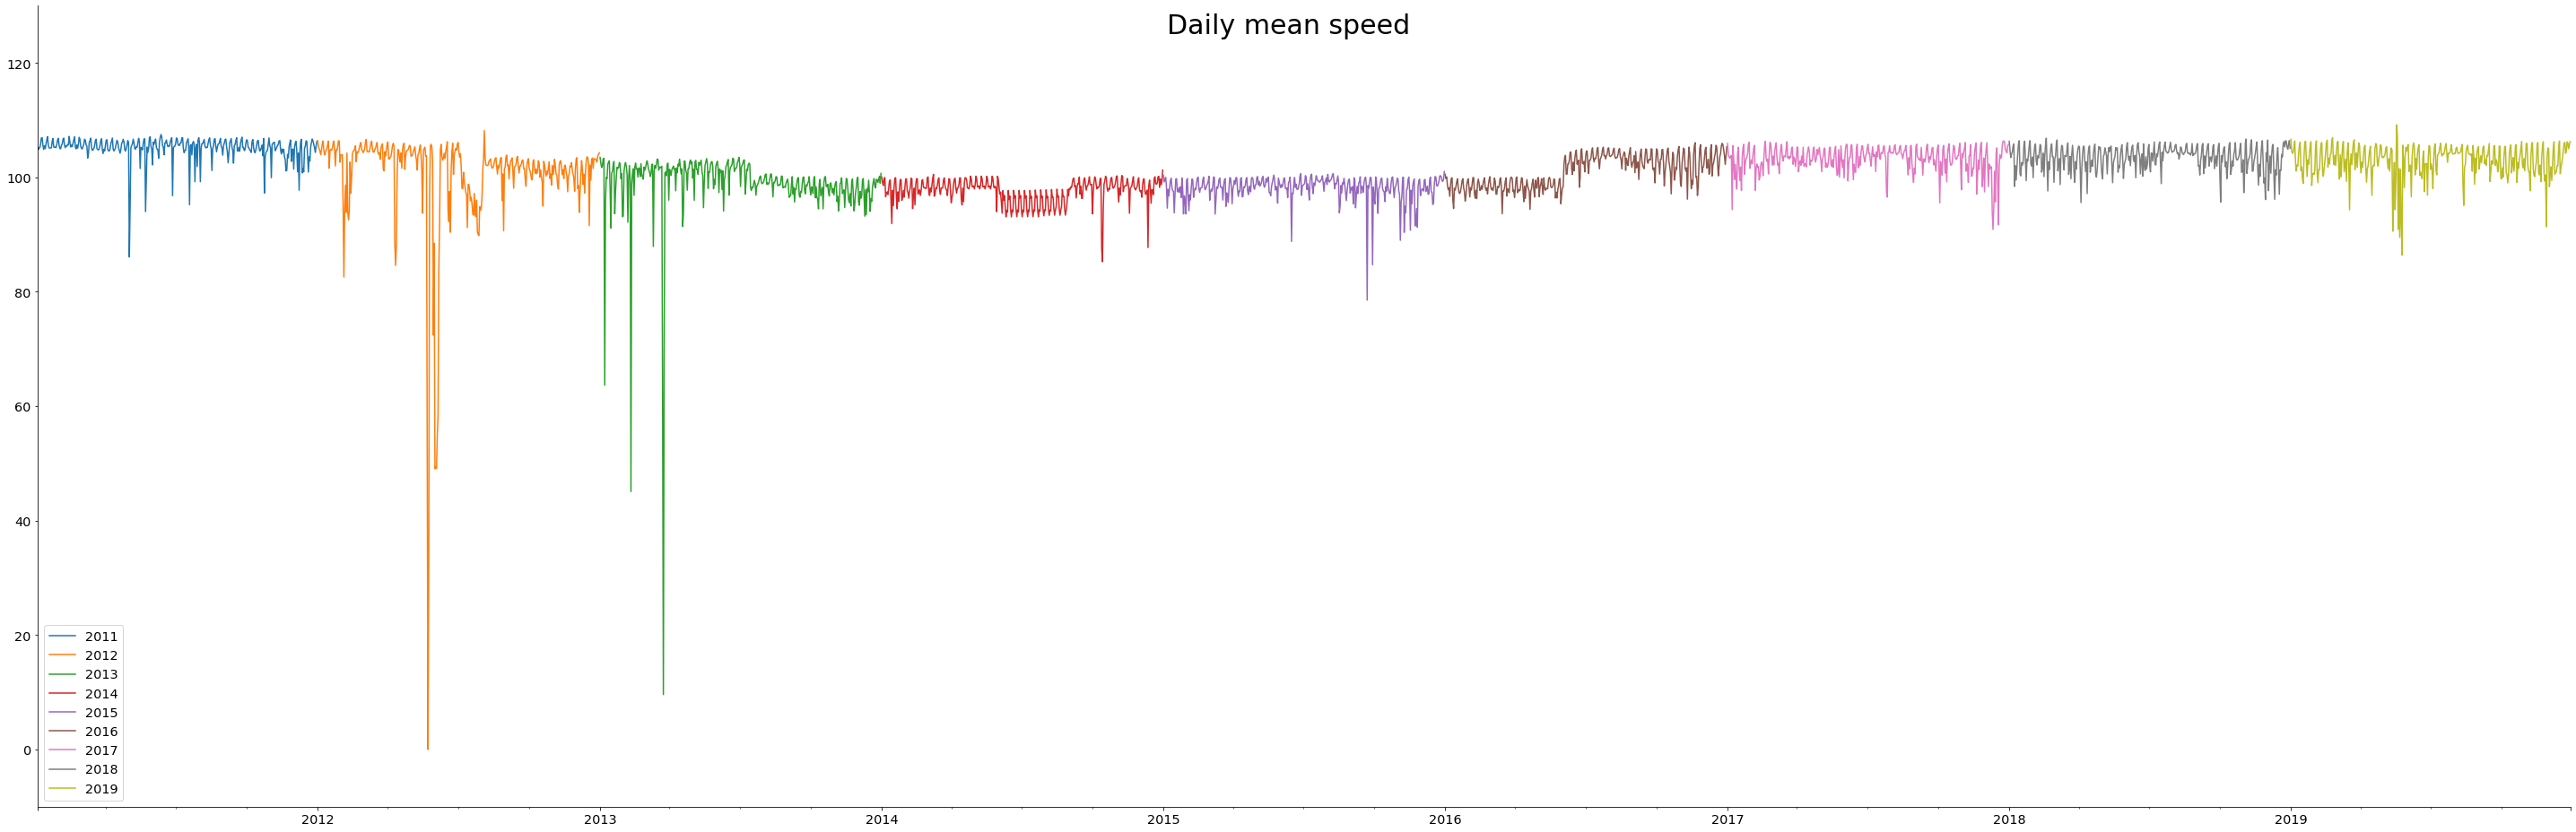

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
params = {"legend.fontsize": "x-large", "figure.figsize": (40, 13), "axes.labelsize": "x-large", "xtick.labelsize":"x-large", "ytick.labelsize":"x-large"}
plt.rcParams.update(params)

fig, ax = plt.subplots(sharey = True)
fig.suptitle("Daily mean speed", fontsize = 30)
ax.set_ylim(-10, 130)
for i, year in enumerate(range(2011, 2020)):
    df_D[(df_D.index.year == year)]["speed"].plot(ax = ax, label = year)
ax.legend()
sns.despine()
plt.tight_layout()

In [0]:
fig.savefig("plots/Daily_speed_mean.png", dpi = 600)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (40, 13), sharey = True)
fig.suptitle("Daily sum of flow (no weekends)", fontsize = 30)

for i, year in enumerate(range(2011, 2020)):
    df_D[(df_D.index.year == year) & (df_D.index.dayofweek != 5) & (df_D.index.dayofweek != 6)]["flow"].plot(ax = ax, label = year)
plt.grid(True)
ax.legend()
sns.despine()
plt.tight_layout()

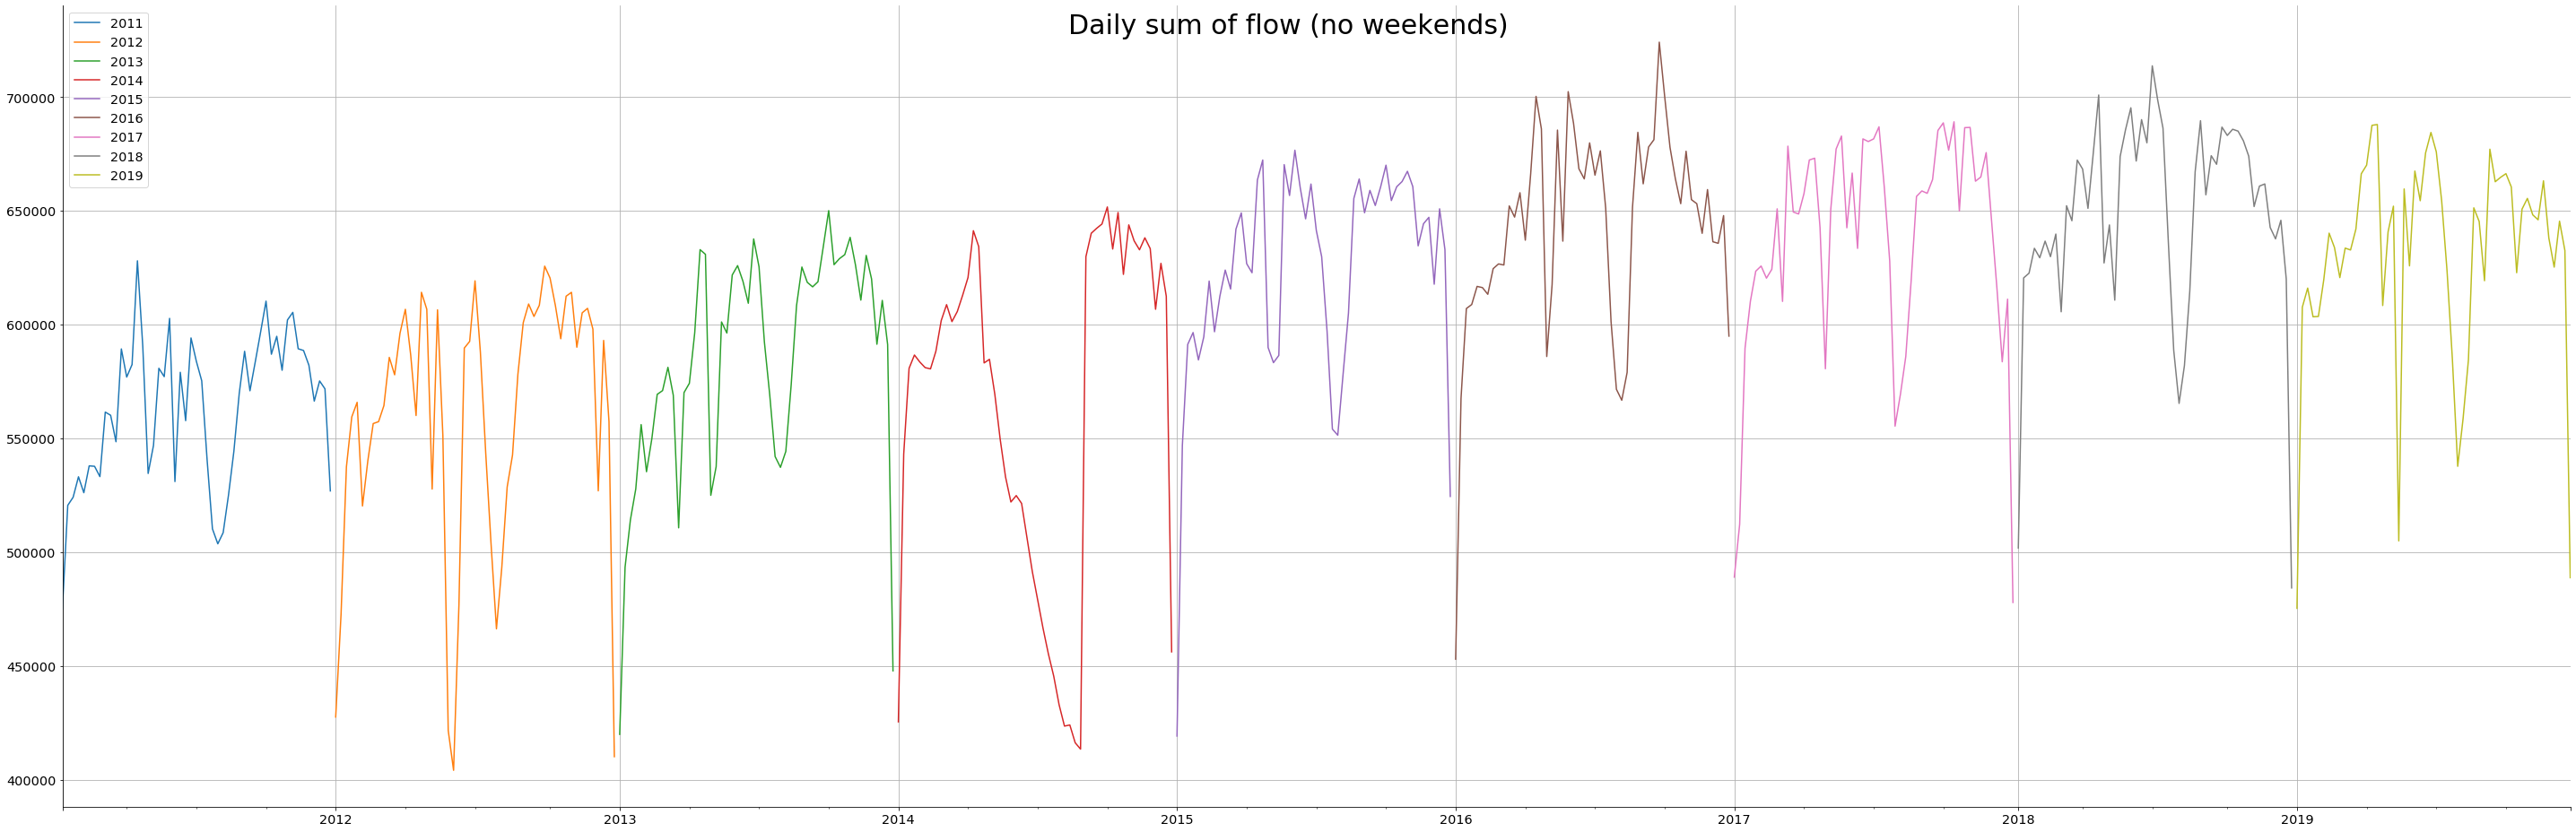

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (40, 13), sharey = True)
fig.suptitle("Daily sum of flow (no weekends)", fontsize = 30)

for i, year in enumerate(range(2011, 2020)):
    df_W[(df_W.index.year == year)]["flow"].plot(ax = ax, label = year)
plt.grid(True)
ax.legend()
sns.despine()
plt.tight_layout()

In [70]:
z

array([[-3.47603240e+06],
       [ 4.84195867e+00]])

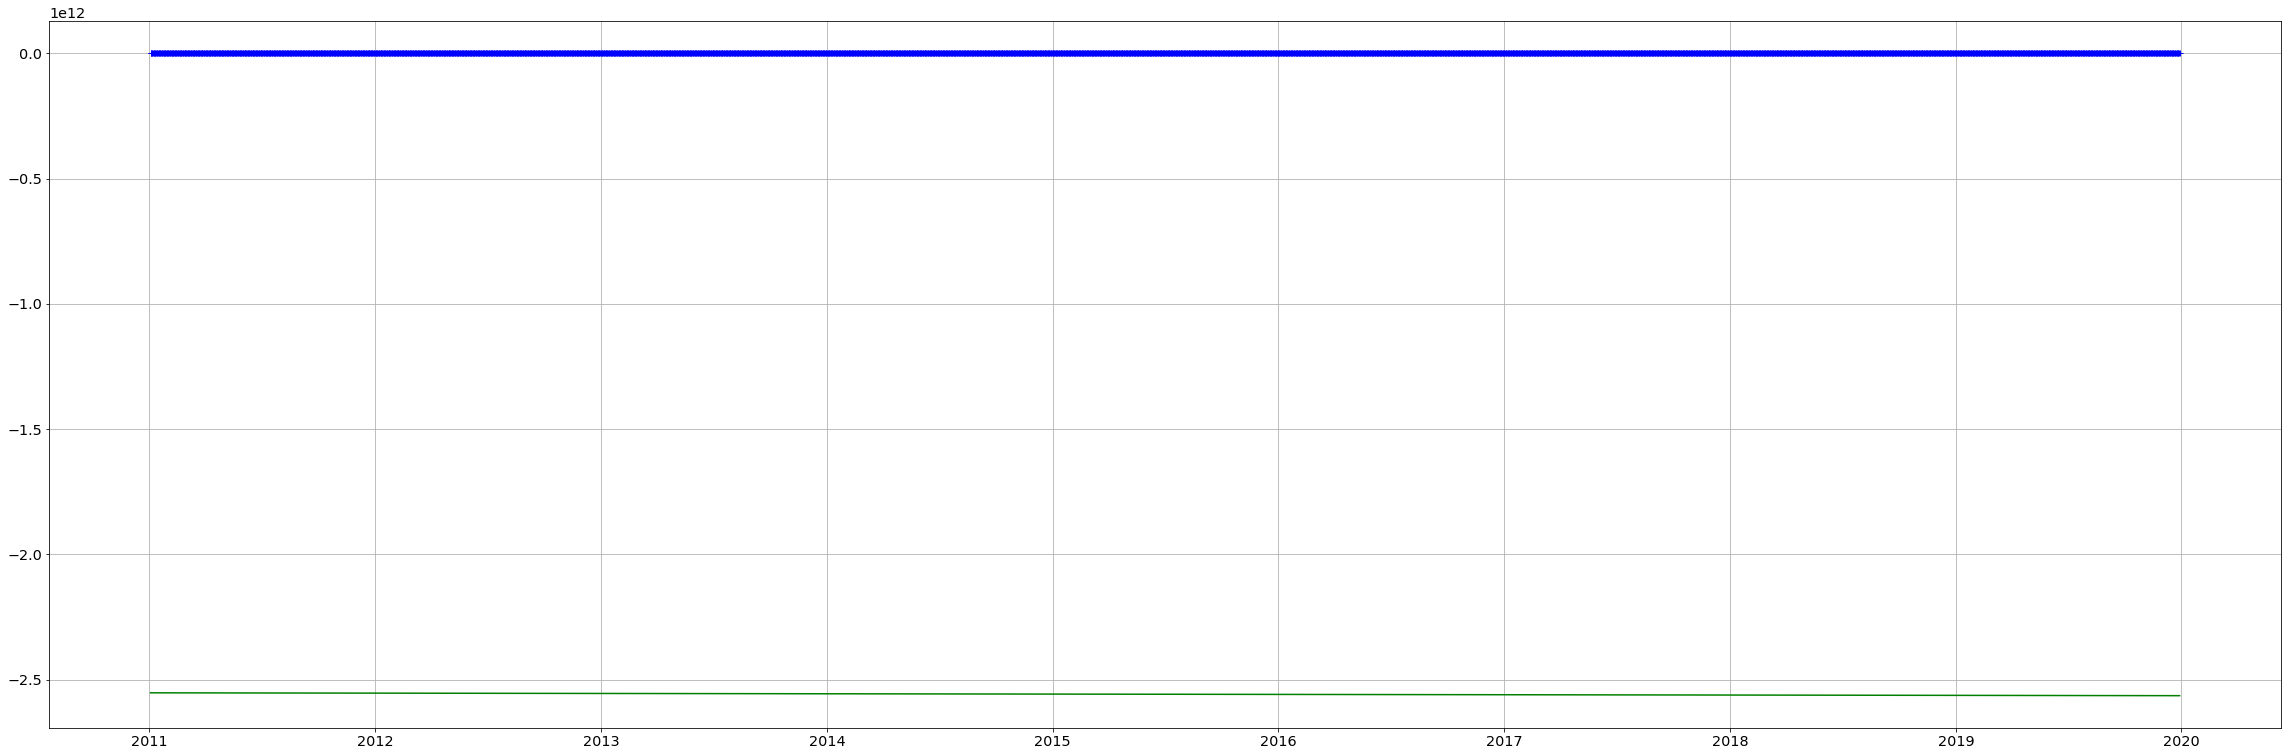

In [72]:
import matplotlib.dates as mdates

x = mdates.date2num(df_D.index)
y = np.reshape(df_D.flow.values,(-1, 1))
z = np.polynomial.polynomial.polyfit(x, y, 1)
p = np.poly1d(np.squeeze(z))

fig, ax = plt.subplots()
xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)
ax.plot(dd, p(xx), "-g")
ax.plot(df_D.index, y, "+", color="b", label="blub")
ax.grid()
plt.show()

In [0]:
# Generate th
np.random.seed(100)
x = list(range(10))
y = x+np.random.rand(10)-0.5
# Calculate the slope and y-intercept of the trendline
fit = np.polyfit(x,y,1)
# Add the trendline
yfit = [n*fit[0] for n in x]+fit[1]
plt.scatter(x,y)
plt.plot(yfit,"black")
plt.show()

In [0]:
plt.plot(x,p(x),"r--")

In [47]:
z

array([[7.86431394e+04],
       [4.84195867e+00]])

In [42]:
trendline

array([[7.86431394e+04],
       [4.84195867e+00]])

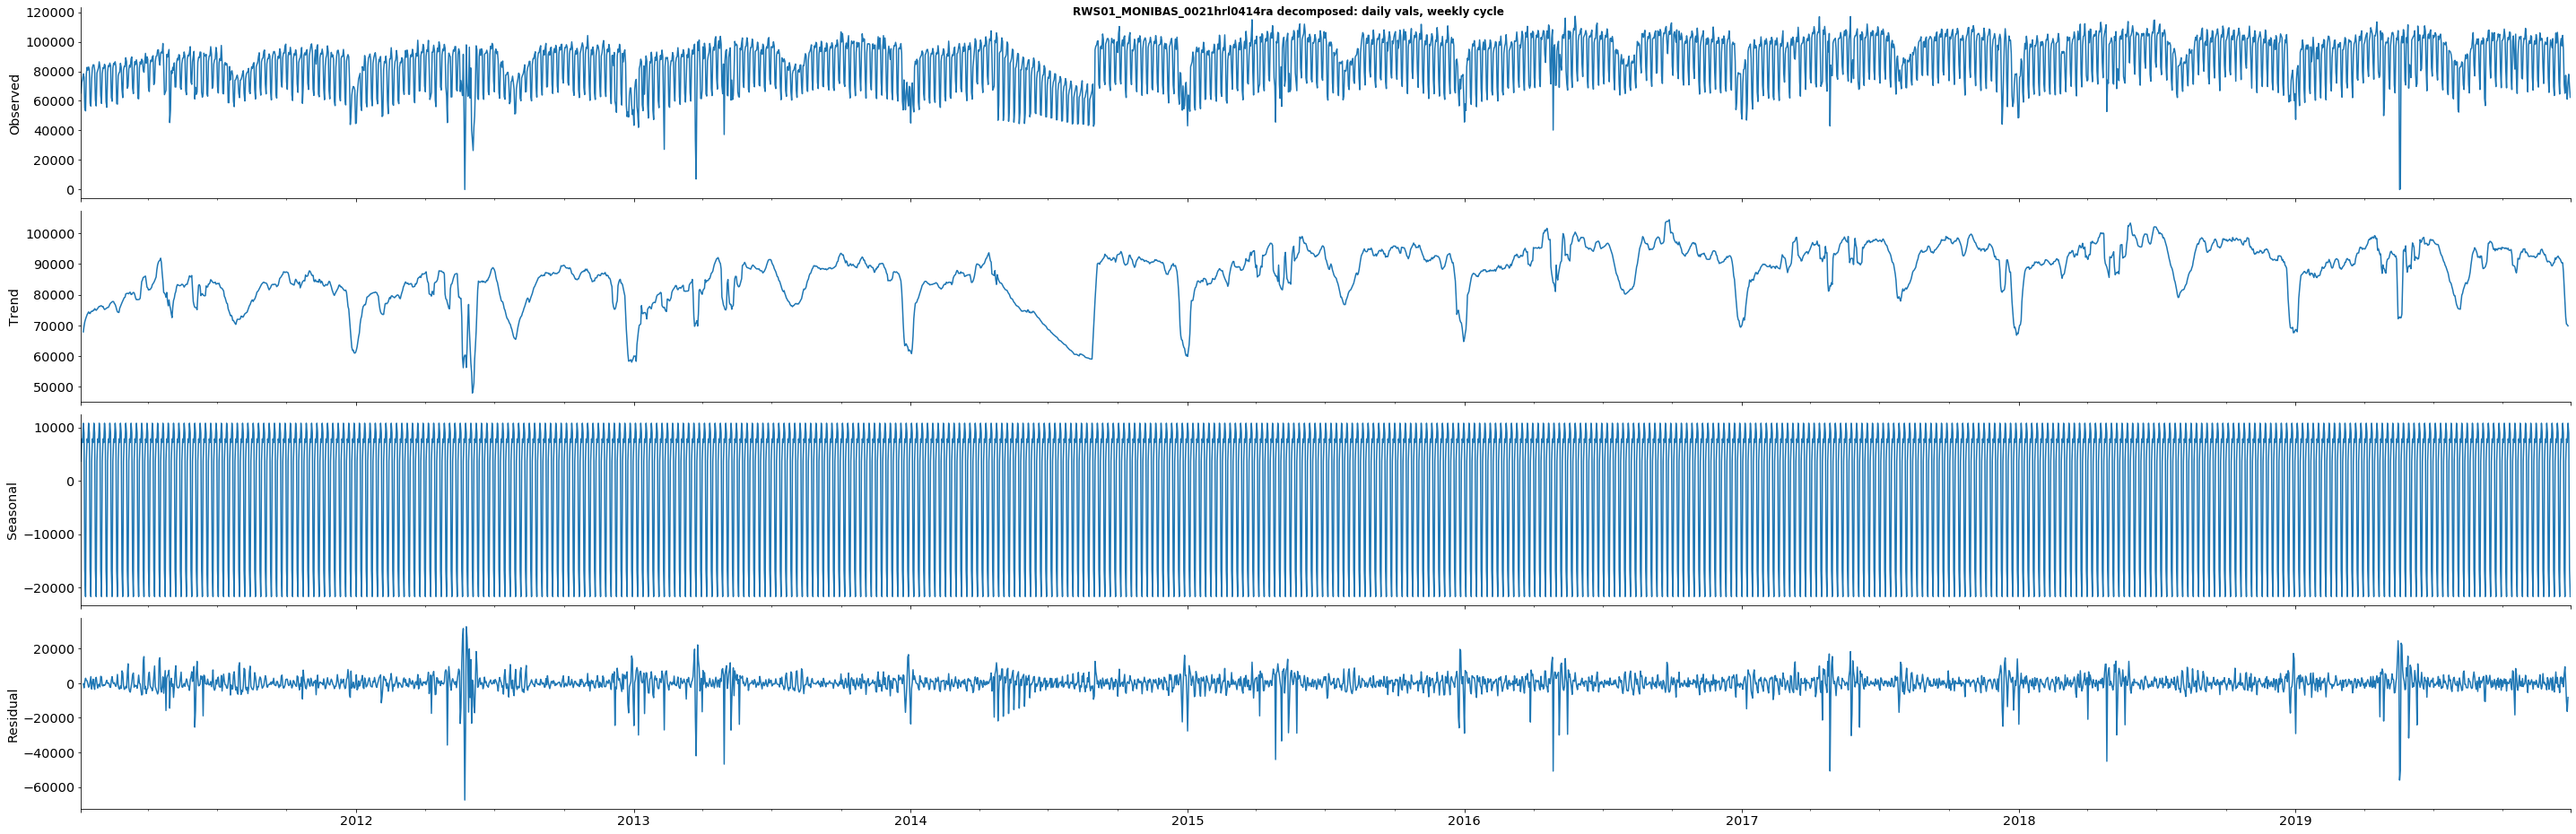

In [23]:
# Plot seasonal decomposition
import statsmodels.tsa.api as smt

y = df_D.flow

decomp = smt.seasonal_decompose(y, model = "additive", freq = 7)
fig =  plt.figure(figsize = (40, 13))
fig.suptitle(f"RWS01_MONIBAS_0021hrl0414ra decomposed: daily vals, weekly cycle", fontsize = 12, fontweight = "bold", y = 0.990)
layout = (4, 1)
observed_ax = plt.subplot2grid(layout, (0, 0)); trend_ax = plt.subplot2grid(layout, (1, 0)); seasonal_ax = plt.subplot2grid(layout, (2, 0)); residual_ax = plt.subplot2grid(layout, (3, 0))
observed_ax.set_ylabel("Observed"); trend_ax.set_ylabel("Trend"); seasonal_ax.set_ylabel("Seasonal"); residual_ax.set_ylabel("Residual")
observed_ax.get_shared_x_axes().join(observed_ax, trend_ax, seasonal_ax, residual_ax)

decomp.observed.plot(ax = observed_ax)
decomp.trend.plot(ax = trend_ax)
decomp.seasonal.plot(ax = seasonal_ax)
decomp.resid.plot(ax = residual_ax)
sns.despine()
plt.tight_layout()
plt.show()

In [0]:
import statsmodels.tsa.api as smt
def correlation_plot(y, title, lags=None, figsize=(16, 9)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=120)
    hist_ax.set_title("Histogram")
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return fig, ts_ax, acf_ax, pacf_ax

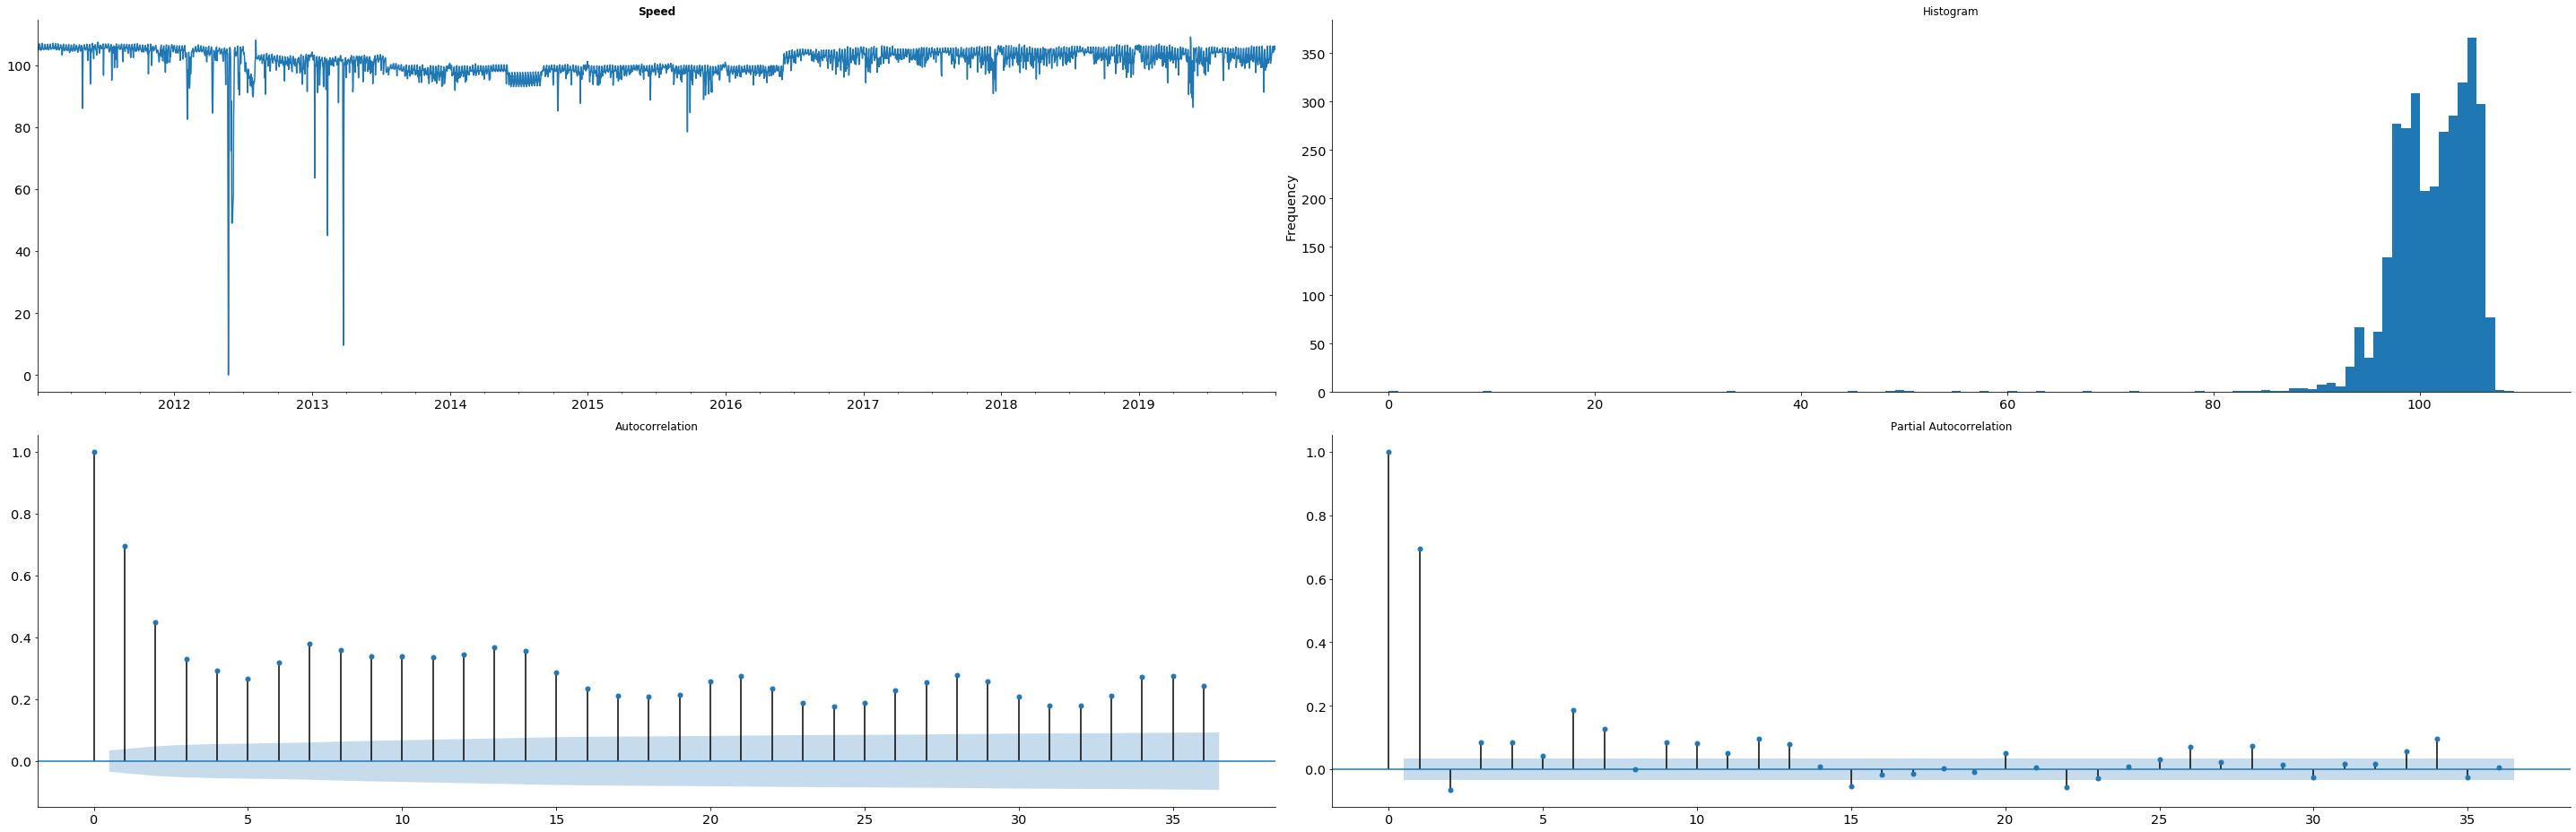

In [30]:
fig = correlation_plot(df_D.speed, "Speed", figsize = (40,13))[0]
plt.show()